# Colorisation d'image (Noir et blanc)

De nombreux format de stockage d'image en couleur sont possible je vous laisse regarder ici (doc de CV2)

https://docs.opencv.org/4.2.0/de/d25/imgproc_color_conversions.html


In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [32]:
!wget 'https://www.dreamyachtcharter.com/wp-content/uploads/2019/03/dyc_ourdays_cuba_web-8-377x207.jpg'

--2021-04-06 12:57:57--  https://www.dreamyachtcharter.com/wp-content/uploads/2019/03/dyc_ourdays_cuba_web-8-377x207.jpg
Resolving www.dreamyachtcharter.com (www.dreamyachtcharter.com)... 35.214.136.247
Connecting to www.dreamyachtcharter.com (www.dreamyachtcharter.com)|35.214.136.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [image/jpeg]
Saving to: 'dyc_ourdays_cuba_web-8-377x207.jpg'

dyc_ourdays_cuba_we 100%[===================>]  13.07K  --.-KB/s    in 0s      

2021-04-06 12:57:58 (88.3 MB/s) - 'dyc_ourdays_cuba_web-8-377x207.jpg' saved [13380/13380]



(207, 377, 3)


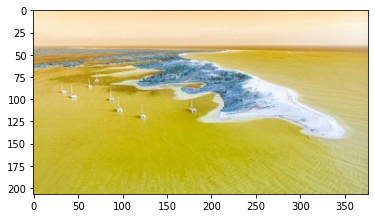

In [37]:
image = cv2.imread('dyc_ourdays_cuba_web-8-377x207.jpg')
print(image.shape)
plt.imshow(image)

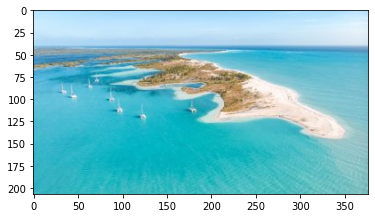

In [38]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

(207, 377)


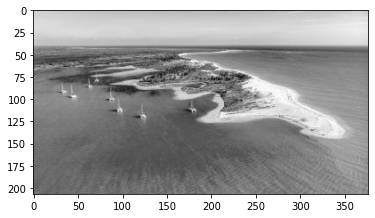

In [43]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)
plt.imshow(image_gray,cmap='gray')

## Format Lab (Light, Green-to-Red, Blue-to-Yellow) (0:255,-127:+128,-127:+128)

![](https://miro.medium.com/max/1400/1*OX9DWIK6bOHKwTAp4Q92pQ.png)

In [48]:
image_Lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
print(image_Lab.shape)

(207, 377, 3)


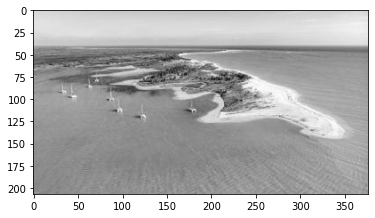

In [49]:
plt.imshow(image_Lab[:,:,0],cmap='gray')

In [52]:
image_Lab

array([[[225, 119, 111],
        [225, 119, 111],
        [225, 119, 111],
        ...,
        [222, 120, 110],
        [221, 120, 110],
        [219, 119, 110]],

       [[226, 119, 111],
        [226, 119, 111],
        [226, 119, 111],
        ...,
        [222, 120, 110],
        [221, 120, 110],
        [221, 120, 110]],

       [[226, 120, 111],
        [226, 120, 111],
        [226, 120, 111],
        ...,
        [223, 120, 111],
        [223, 119, 111],
        [222, 119, 111]],

       ...,

       [[161,  99, 112],
        [167,  98, 113],
        [171,  99, 111],
        ...,
        [186, 107, 121],
        [178, 106, 121],
        [175, 106, 121]],

       [[170,  98, 112],
        [176,  98, 112],
        [180,  98, 112],
        ...,
        [188, 107, 121],
        [181, 106, 121],
        [177, 105, 121]],

       [[171,  98, 113],
        [175,  98, 113],
        [176,  98, 113],
        ...,
        [189, 107, 121],
        [183, 106, 121],
        [178, 105, 121]]

## Dataset CIFAR100 (image couleur 32x32x3)

In [53]:
from keras.datasets import cifar100
(x_train, _), (x_test, _) = cifar100.load_data()

In [54]:
x_train.shape

(50000, 32, 32, 3)

In [55]:
x_test.shape

(10000, 32, 32, 3)

In [56]:
cv2.cvtColor(x_train[0], cv2.COLOR_BGR2LAB)

array([[[255, 128, 128],
        [255, 128, 128],
        [255, 128, 128],
        ...,
        [207, 122, 132],
        [223, 119, 132],
        [194, 116, 131]],

       [[255, 128, 128],
        [254, 128, 128],
        [254, 128, 128],
        ...,
        [178, 118, 128],
        [168, 114, 127],
        [154, 112, 128]],

       [[255, 128, 128],
        [254, 128, 128],
        [255, 128, 128],
        ...,
        [199, 116, 130],
        [176, 110, 129],
        [133, 109, 129]],

       ...,

       [[175,  89, 138],
        [170,  84, 139],
        [168,  86, 138],
        ...,
        [ 11, 128, 118],
        [ 60, 114, 122],
        [ 75, 110, 123]],

       [[150,  92, 138],
        [147,  91, 138],
        [153,  93, 138],
        ...,
        [ 10, 126, 123],
        [110, 105, 131],
        [156, 100, 131]],

       [[117,  95, 140],
        [117,  94, 139],
        [129,  96, 139],
        ...,
        [ 31, 117, 126],
        [129,  98, 136],
        [165,  92, 138]]

## Principe sur la base Lab

Le codage peut (doit) se faire sur des données normalisées, il faudra post-traiter pour visualiser.
* L entre 0 et 1
* a entre -1 et 1 (utiliser tanh comme fonction d'activation)
* b entre -1 et 1 (utiliser tanh comme fonction d'activation)

![](https://xiangyutang2.github.io/auto-colorization-autoencoders/autoencoder.png)

Mettre en place un réseau de la forme suivante (attention ici les dimensions ne sont pas les bonnes

In [ ]:
#Design the neural network
model = Sequential()
# encoder
model.add(InputLayer(input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# decoder
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))